Link for data folder
https://drive.google.com/drive/folders/1iEeyhet_jgdpNnkq1VcWbPKWHm8qe5it?usp=sharing

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [ ]:
Path = "/content/drive/MyDrive/Building Systems Project"
Building_data_name ="building_metadata.csv"
weather_data_name = "weather_train.csv"
train_data_name = "train.csv" 

In [ ]:
Building_data_path = os.path.join(Path,Building_data_name)
weather_data_path = os.path.join(Path,weather_data_name)
train_data_path = os.path.join(Path,train_data_name)

In [ ]:
Building_data = pd.read_csv(Building_data_path,sep=",",index_col = 0)
train_data = pd.read_csv(train_data_path,sep=",",index_col = 2,parse_dates=True)
weather_data = pd.read_csv(weather_data_path,sep=",",index_col = 1,parse_dates=True)

In [ ]:
Building_data.head()

,building_id,primary_use,square_feet,year_built,floor_count
site_id,,,,,
0,0,Education,7432,2008.0,NaN
0,1,Education,2720,2004.0,NaN
0,2,Education,5376,1991.0,NaN
0,3,Education,23685,2002.0,NaN
0,4,Education,116607,1975.0,NaN


In [ ]:
train_data.head()

,building_id,meter,meter_reading
timestamp,,,
2016-01-01,0,0,0.0
2016-01-01,1,0,0.0
2016-01-01,2,0,0.0
2016-01-01,3,0,0.0
2016-01-01,4,0,0.0


In [ ]:
train_data.tail()

,building_id,meter,meter_reading
timestamp,,,
2016-12-31 23:00:00,1444,0,8.750
2016-12-31 23:00:00,1445,0,4.825
2016-12-31 23:00:00,1446,0,0.000
2016-12-31 23:00:00,1447,0,159.575
2016-12-31 23:00:00,1448,0,2.850


In [ ]:
weather_data.head()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-01-01 00:00:00,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 01:00:00,0,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2016-01-01 02:00:00,0,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
2016-01-01 03:00:00,0,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
2016-01-01 04:00:00,0,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [ ]:
weather_data.tail()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-12-31 19:00:00,15,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
2016-12-31 20:00:00,15,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
2016-12-31 21:00:00,15,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
2016-12-31 22:00:00,15,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6
2016-12-31 23:00:00,15,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [ ]:
Building_data_size = Building_data.shape
train_data_size = train_data.shape
weather_data_size = train_data.shape

In [ ]:
print("Building data size = ",Building_data_size)
print("train data size = ",train_data_size)
print("weather data size = ",weather_data_size)

Building data size =  (1449, 5)
train data size =  (20216100, 3)
weather data size =  (20216100, 3)


As the data set we are dealing with is too large we define a function to decrease the size of the dataset (This function was copied from the dataset we are using)

In [ ]:
def reduce_memory_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16','float32', 'float32']
    start_mem = df.memory_usage().sum() / (1024**2)
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                    
            else:
                if c_min > np.iinfo(np.float16).min and c_max < np.iinfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.iinfo(np.float32).min and c_max < np.iinfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum()/ (1024**2)
    
    if verbose:
        print('Memory usage decreased to {:5.2f}Mb ({:.1f}%  reduction) '.format(end_mem , 100*((start_mem - end_mem)/start_mem)))
    return df

In [ ]:
reduce_memory_usage(Building_data)
reduce_memory_usage(train_data)
reduce_memory_usage(weather_data)

Memory usage decreased to  0.05Mb (20.8%  reduction) 
Memory usage decreased to 366.31Mb (40.6%  reduction) 
Memory usage decreased to  8.66Mb (9.7%  reduction) 


,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-01-01 00:00:00,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 01:00:00,0,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2016-01-01 02:00:00,0,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
2016-01-01 03:00:00,0,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
2016-01-01 04:00:00,0,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,15,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
2016-12-31 20:00:00,15,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
2016-12-31 21:00:00,15,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1


In [ ]:
Building_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   building_id  1449 non-null   int16  
 1   primary_use  1449 non-null   object 
 2   square_feet  1449 non-null   int32  
 3   year_built   675 non-null    float64
 4   floor_count  355 non-null    float64
dtypes: float64(2), int16(1), int32(1), object(1)
memory usage: 53.8+ KB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20216100 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int16  
 1   meter          int8   
 2   meter_reading  float64
dtypes: float64(1), int16(1), int8(1)
memory usage: 366.3 MB


In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139773 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int8   
 1   air_temperature     139718 non-null  float64
 2   cloud_coverage      70600 non-null   float64
 3   dew_temperature     139660 non-null  float64
 4   precip_depth_1_hr   89484 non-null   float64
 5   sea_level_pressure  129155 non-null  float64
 6   wind_direction      133505 non-null  float64
 7   wind_speed          139469 non-null  float64
dtypes: float64(7), int8(1)
memory usage: 8.7 MB


In [ ]:
Building_data.sort_values(by = "square_feet", ascending=False)

,building_id,primary_use,square_feet,year_built,floor_count
site_id,,,,,
8,869,Entertainment/public assembly,875000,NaN,1.0
13,1148,Office,861524,NaN,NaN
3,375,Office,850354,1989.0,NaN
3,365,Healthcare,819577,1922.0,NaN
2,269,Entertainment/public assembly,809530,1958.0,NaN
...,...,...,...,...,...
8,846,Entertainment/public assembly,481,NaN,1.0
4,621,Parking,387,1955.0,1.0
8,822,Entertainment/public assembly,366,NaN,1.0


In [ ]:
Building_data.isnull().sum()

building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

In [ ]:
weather_data.isnull().sum()

site_id                   0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

In [ ]:
train_data.isnull().sum()

building_id      0
meter            0
meter_reading    0
dtype: int64

In [ ]:
Building_data.describe()

,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,675.000000,355.000000
mean,724.000000,92111.776398,1967.957037,3.740845
std,418.434583,110769.950997,31.054030,3.333683
min,0.000000,283.000000,1900.000000,1.000000
25%,362.000000,23012.000000,1949.000000,1.000000
50%,724.000000,57673.000000,1970.000000,3.000000
75%,1086.000000,115676.000000,1995.000000,5.000000
max,1448.000000,875000.000000,2017.000000,26.000000


In [ ]:
train_data.describe()

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03
std,4.269133e+02,9.309921e-01,1.532356e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


In [ ]:
weather_data.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


In [ ]:
train_data

,building_id,meter,meter_reading
timestamp,,,
2016-01-01 00:00:00,0,0,0.000
2016-01-01 00:00:00,1,0,0.000
2016-01-01 00:00:00,2,0,0.000
2016-01-01 00:00:00,3,0,0.000
2016-01-01 00:00:00,4,0,0.000
...,...,...,...
2016-12-31 23:00:00,1444,0,8.750
2016-12-31 23:00:00,1445,0,4.825
2016-12-31 23:00:00,1446,0,0.000


In [ ]:
weather_data

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-01-01 00:00:00,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 01:00:00,0,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2016-01-01 02:00:00,0,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
2016-01-01 03:00:00,0,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
2016-01-01 04:00:00,0,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,15,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
2016-12-31 20:00:00,15,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
2016-12-31 21:00:00,15,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1


In [ ]:
train_average_data_meter = (train_data.groupby("meter").meter_reading.resample("d").mean().reset_index())
train_daily_average = (train_average_data_meter.pivot(index = "timestamp", columns = "meter", values = "meter_reading").reset_index())

In [ ]:
train_daily_average

meter,timestamp,0,1,2,3
0,2016-01-01,126.716136,129.533005,9147.192609,472.830937
1,2016-01-02,128.754801,132.001451,4878.753868,586.591604
2,2016-01-03,127.366815,138.475483,4756.754498,535.994152
3,2016-01-04,150.324425,139.168032,6480.007671,783.455319
4,2016-01-05,153.210311,134.758949,10448.088650,719.380343
...,...,...,...,...,...
361,2016-12-27,158.977885,266.391321,2242.025523,676.401602
362,2016-12-28,163.956063,263.509167,2110.197330,521.647227
363,2016-12-29,165.924481,223.430442,2177.415196,546.549554
364,2016-12-30,164.607010,166.758115,2363.662332,599.150183


In [ ]:
train_daily_average.rename(columns={0:"electricity",1:"chilled_Water",2:"steam",3:"Hot_water"},inplace=True)

In [ ]:
train_daily_average

meter,timestamp,electricity,chilled_Water,steam,Hot_water
0,2016-01-01,126.716136,129.533005,9147.192609,472.830937
1,2016-01-02,128.754801,132.001451,4878.753868,586.591604
2,2016-01-03,127.366815,138.475483,4756.754498,535.994152
3,2016-01-04,150.324425,139.168032,6480.007671,783.455319
4,2016-01-05,153.210311,134.758949,10448.088650,719.380343
...,...,...,...,...,...
361,2016-12-27,158.977885,266.391321,2242.025523,676.401602
362,2016-12-28,163.956063,263.509167,2110.197330,521.647227
363,2016-12-29,165.924481,223.430442,2177.415196,546.549554
364,2016-12-30,164.607010,166.758115,2363.662332,599.150183


In [ ]:
weather_data_daily_average = (weather_data.resample("d").mean())
weather_data_daily_average.reset_index(inplace=True)

In [ ]:
weather_data_daily_average

,timestamp,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,2016-01-01,7.288043,5.365489,2.184524,0.467391,0.063025,1019.296341,173.491620,3.688587
1,2016-01-02,7.340426,5.340160,1.988571,-0.322872,-0.033333,1016.618563,201.215470,4.015426
2,2016-01-03,7.331551,5.482353,1.969512,0.240107,0.527778,1012.139458,205.537190,3.927807
3,2016-01-04,7.164706,4.125294,1.971429,-1.981471,0.280992,1011.762416,226.737805,3.708235
4,2016-01-05,7.109091,3.766667,1.859551,-1.519697,0.529167,1016.509790,184.716981,4.133030
...,...,...,...,...,...,...,...,...,...
361,2016-12-27,7.484211,7.958421,2.285024,3.553684,0.282869,1022.201425,180.189702,3.267810
362,2016-12-28,7.480418,6.505483,1.538117,1.417493,0.075099,1022.150000,164.220430,2.405759
363,2016-12-29,7.492147,5.672775,1.557018,1.148691,1.100000,1019.173088,144.797844,2.909424
364,2016-12-30,7.500000,4.369531,2.869318,-2.324479,0.011719,1016.457542,230.459459,3.894531


In [ ]:
weather_train_data = (train_average_data_meter.merge(weather_data_daily_average,on="timestamp",how="left"))

In [ ]:
weather_train_data

,meter,timestamp,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01,126.716136,7.288043,5.365489,2.184524,0.467391,0.063025,1019.296341,173.491620,3.688587
1,0,2016-01-02,128.754801,7.340426,5.340160,1.988571,-0.322872,-0.033333,1016.618563,201.215470,4.015426
2,0,2016-01-03,127.366815,7.331551,5.482353,1.969512,0.240107,0.527778,1012.139458,205.537190,3.927807
3,0,2016-01-04,150.324425,7.164706,4.125294,1.971429,-1.981471,0.280992,1011.762416,226.737805,3.708235
4,0,2016-01-05,153.210311,7.109091,3.766667,1.859551,-1.519697,0.529167,1016.509790,184.716981,4.133030
...,...,...,...,...,...,...,...,...,...,...,...
1459,3,2016-12-27,676.401602,7.484211,7.958421,2.285024,3.553684,0.282869,1022.201425,180.189702,3.267810
1460,3,2016-12-28,521.647227,7.480418,6.505483,1.538117,1.417493,0.075099,1022.150000,164.220430,2.405759
1461,3,2016-12-29,546.549554,7.492147,5.672775,1.557018,1.148691,1.100000,1019.173088,144.797844,2.909424
1462,3,2016-12-30,599.150183,7.500000,4.369531,2.869318,-2.324479,0.011719,1016.457542,230.459459,3.894531


In [ ]:
weather_train_data["meter"] = (weather_train_data["meter"].map({0:"electricity",1:"chilled_Water",2:"steam",3:"Hot_water"}))

In [ ]:
weather_train_data

,meter,timestamp,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,electricity,2016-01-01,126.716136,7.288043,5.365489,2.184524,0.467391,0.063025,1019.296341,173.491620,3.688587
1,electricity,2016-01-02,128.754801,7.340426,5.340160,1.988571,-0.322872,-0.033333,1016.618563,201.215470,4.015426
2,electricity,2016-01-03,127.366815,7.331551,5.482353,1.969512,0.240107,0.527778,1012.139458,205.537190,3.927807
3,electricity,2016-01-04,150.324425,7.164706,4.125294,1.971429,-1.981471,0.280992,1011.762416,226.737805,3.708235
4,electricity,2016-01-05,153.210311,7.109091,3.766667,1.859551,-1.519697,0.529167,1016.509790,184.716981,4.133030
...,...,...,...,...,...,...,...,...,...,...,...
1459,Hot_water,2016-12-27,676.401602,7.484211,7.958421,2.285024,3.553684,0.282869,1022.201425,180.189702,3.267810
1460,Hot_water,2016-12-28,521.647227,7.480418,6.505483,1.538117,1.417493,0.075099,1022.150000,164.220430,2.405759
1461,Hot_water,2016-12-29,546.549554,7.492147,5.672775,1.557018,1.148691,1.100000,1019.173088,144.797844,2.909424
1462,Hot_water,2016-12-30,599.150183,7.500000,4.369531,2.869318,-2.324479,0.011719,1016.457542,230.459459,3.894531


In [ ]:
weather_train_data_for_corr = weather_train_data.set_index("meter")

In [ ]:
weather_train_data_for_corr

,timestamp,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter,,,,,,,,,,
electricity,2016-01-01,126.716136,7.288043,5.365489,2.184524,0.467391,0.063025,1019.296341,173.491620,3.688587
electricity,2016-01-02,128.754801,7.340426,5.340160,1.988571,-0.322872,-0.033333,1016.618563,201.215470,4.015426
electricity,2016-01-03,127.366815,7.331551,5.482353,1.969512,0.240107,0.527778,1012.139458,205.537190,3.927807
electricity,2016-01-04,150.324425,7.164706,4.125294,1.971429,-1.981471,0.280992,1011.762416,226.737805,3.708235
electricity,2016-01-05,153.210311,7.109091,3.766667,1.859551,-1.519697,0.529167,1016.509790,184.716981,4.133030
...,...,...,...,...,...,...,...,...,...,...
Hot_water,2016-12-27,676.401602,7.484211,7.958421,2.285024,3.553684,0.282869,1022.201425,180.189702,3.267810
Hot_water,2016-12-28,521.647227,7.480418,6.505483,1.538117,1.417493,0.075099,1022.150000,164.220430,2.405759
Hot_water,2016-12-29,546.549554,7.492147,5.672775,1.557018,1.148691,1.100000,1019.173088,144.797844,2.909424


In [ ]:
weather_train_data_electricity = weather_train_data_for_corr.loc["electricity"]
weather_train_data_chilledWater = weather_train_data_for_corr.loc["chilled_Water"]
weather_train_data_steam = weather_train_data_for_corr.loc["steam"]
weather_train_data_HotWater = weather_train_data_for_corr.loc["Hot_water"]

In [ ]:
weather_train_data_electricity

,timestamp,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter,,,,,,,,,,
electricity,2016-01-01,126.716136,7.288043,5.365489,2.184524,0.467391,0.063025,1019.296341,173.491620,3.688587
electricity,2016-01-02,128.754801,7.340426,5.340160,1.988571,-0.322872,-0.033333,1016.618563,201.215470,4.015426
electricity,2016-01-03,127.366815,7.331551,5.482353,1.969512,0.240107,0.527778,1012.139458,205.537190,3.927807
electricity,2016-01-04,150.324425,7.164706,4.125294,1.971429,-1.981471,0.280992,1011.762416,226.737805,3.708235
electricity,2016-01-05,153.210311,7.109091,3.766667,1.859551,-1.519697,0.529167,1016.509790,184.716981,4.133030
...,...,...,...,...,...,...,...,...,...,...
electricity,2016-12-27,158.977885,7.484211,7.958421,2.285024,3.553684,0.282869,1022.201425,180.189702,3.267810
electricity,2016-12-28,163.956063,7.480418,6.505483,1.538117,1.417493,0.075099,1022.150000,164.220430,2.405759
electricity,2016-12-29,165.924481,7.492147,5.672775,1.557018,1.148691,1.100000,1019.173088,144.797844,2.909424


In [ ]:
weather_train_data_electricity.corr()

,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter_reading,1.000000,0.056445,0.575112,-0.091825,0.616622,0.090528,-0.017601,-0.027264,-0.353534
site_id,0.056445,1.000000,0.030397,-0.099421,0.013568,0.039328,0.120831,-0.079275,-0.011651
air_temperature,0.575112,0.030397,1.000000,-0.021863,0.975585,0.191121,-0.328574,-0.071506,-0.300673
cloud_coverage,-0.091825,-0.099421,-0.021863,1.000000,0.057948,0.127375,-0.120946,-0.095531,0.033309
dew_temperature,0.616622,0.013568,0.975585,0.057948,1.000000,0.240140,-0.298052,-0.140800,-0.355165
precip_depth_1_hr,0.090528,0.039328,0.191121,0.127375,0.240140,1.000000,-0.193579,-0.091739,-0.011648
sea_level_pressure,-0.017601,0.120831,-0.328574,-0.120946,-0.298052,-0.193579,1.000000,-0.271948,-0.277660
wind_direction,-0.027264,-0.079275,-0.071506,-0.095531,-0.140800,-0.091739,-0.271948,1.000000,0.371259
wind_speed,-0.353534,-0.011651,-0.300673,0.033309,-0.355165,-0.011648,-0.277660,0.371259,1.000000


In [ ]:
weather_train_data_chilledWater.corr()

,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter_reading,1.000000,0.072520,0.684542,-0.038073,0.716986,0.126591,-0.124728,-0.176759,-0.286518
site_id,0.072520,1.000000,0.030397,-0.099421,0.013568,0.039328,0.120831,-0.079275,-0.011651
air_temperature,0.684542,0.030397,1.000000,-0.021863,0.975585,0.191121,-0.328574,-0.071506,-0.300673
cloud_coverage,-0.038073,-0.099421,-0.021863,1.000000,0.057948,0.127375,-0.120946,-0.095531,0.033309
dew_temperature,0.716986,0.013568,0.975585,0.057948,1.000000,0.240140,-0.298052,-0.140800,-0.355165
precip_depth_1_hr,0.126591,0.039328,0.191121,0.127375,0.240140,1.000000,-0.193579,-0.091739,-0.011648
sea_level_pressure,-0.124728,0.120831,-0.328574,-0.120946,-0.298052,-0.193579,1.000000,-0.271948,-0.277660
wind_direction,-0.176759,-0.079275,-0.071506,-0.095531,-0.140800,-0.091739,-0.271948,1.000000,0.371259
wind_speed,-0.286518,-0.011651,-0.300673,0.033309,-0.355165,-0.011648,-0.277660,0.371259,1.000000


In [ ]:
weather_train_data_HotWater.corr()

,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter_reading,1.000000,-0.057920,-0.765685,0.047403,-0.718708,-0.165213,0.385555,0.088564,0.131357
site_id,-0.057920,1.000000,0.030397,-0.099421,0.013568,0.039328,0.120831,-0.079275,-0.011651
air_temperature,-0.765685,0.030397,1.000000,-0.021863,0.975585,0.191121,-0.328574,-0.071506,-0.300673
cloud_coverage,0.047403,-0.099421,-0.021863,1.000000,0.057948,0.127375,-0.120946,-0.095531,0.033309
dew_temperature,-0.718708,0.013568,0.975585,0.057948,1.000000,0.240140,-0.298052,-0.140800,-0.355165
precip_depth_1_hr,-0.165213,0.039328,0.191121,0.127375,0.240140,1.000000,-0.193579,-0.091739,-0.011648
sea_level_pressure,0.385555,0.120831,-0.328574,-0.120946,-0.298052,-0.193579,1.000000,-0.271948,-0.277660
wind_direction,0.088564,-0.079275,-0.071506,-0.095531,-0.140800,-0.091739,-0.271948,1.000000,0.371259
wind_speed,0.131357,-0.011651,-0.300673,0.033309,-0.355165,-0.011648,-0.277660,0.371259,1.000000


In [ ]:
weather_train_data_steam.corr()

,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter_reading,1.000000,-0.042709,0.004363,0.024297,-0.085668,0.005797,-0.225068,-0.104242,0.117023
site_id,-0.042709,1.000000,0.030397,-0.099421,0.013568,0.039328,0.120831,-0.079275,-0.011651
air_temperature,0.004363,0.030397,1.000000,-0.021863,0.975585,0.191121,-0.328574,-0.071506,-0.300673
cloud_coverage,0.024297,-0.099421,-0.021863,1.000000,0.057948,0.127375,-0.120946,-0.095531,0.033309
dew_temperature,-0.085668,0.013568,0.975585,0.057948,1.000000,0.240140,-0.298052,-0.140800,-0.355165
precip_depth_1_hr,0.005797,0.039328,0.191121,0.127375,0.240140,1.000000,-0.193579,-0.091739,-0.011648
sea_level_pressure,-0.225068,0.120831,-0.328574,-0.120946,-0.298052,-0.193579,1.000000,-0.271948,-0.277660
wind_direction,-0.104242,-0.079275,-0.071506,-0.095531,-0.140800,-0.091739,-0.271948,1.000000,0.371259
wind_speed,0.117023,-0.011651,-0.300673,0.033309,-0.355165,-0.011648,-0.277660,0.371259,1.000000


In [ ]:
plt.rcParams['figure.max_open_warning'] = 0

In [ ]:
import seaborn as sns

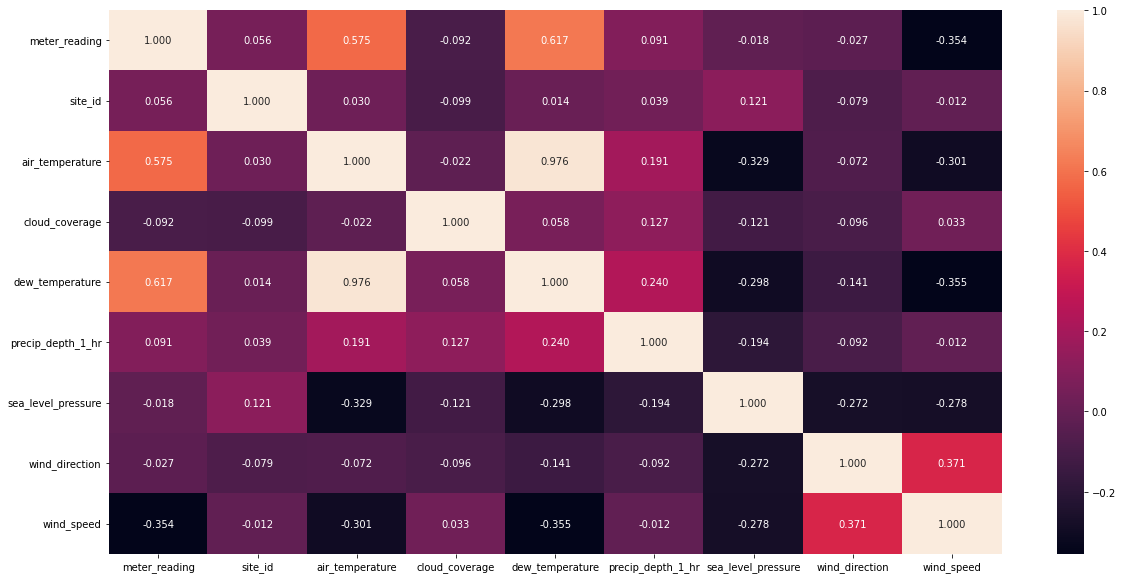

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data = weather_train_data_electricity.corr(), ax=ax, annot = True, fmt=".3f" )
plt.savefig("/content/drive/MyDrive/Building Systems Project/Heat map for Electricity.png",dpi = 300)

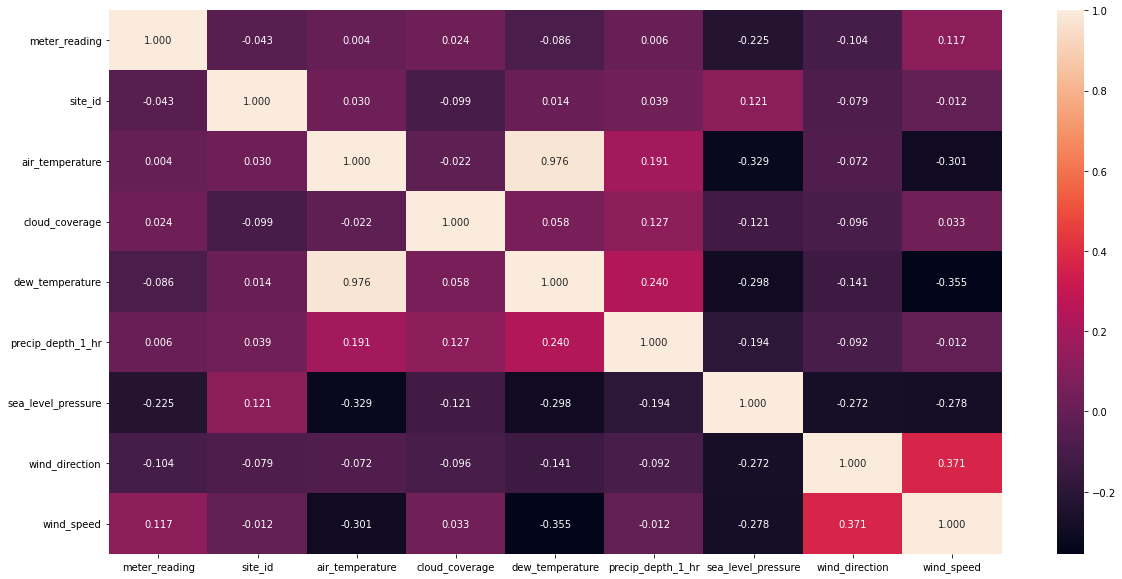

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data = weather_train_data_steam.corr(), ax=ax, annot = True, fmt=".3f" )
plt.savefig("/content/drive/MyDrive/Building Systems Project/Heat map for Steam.png",dpi = 300)

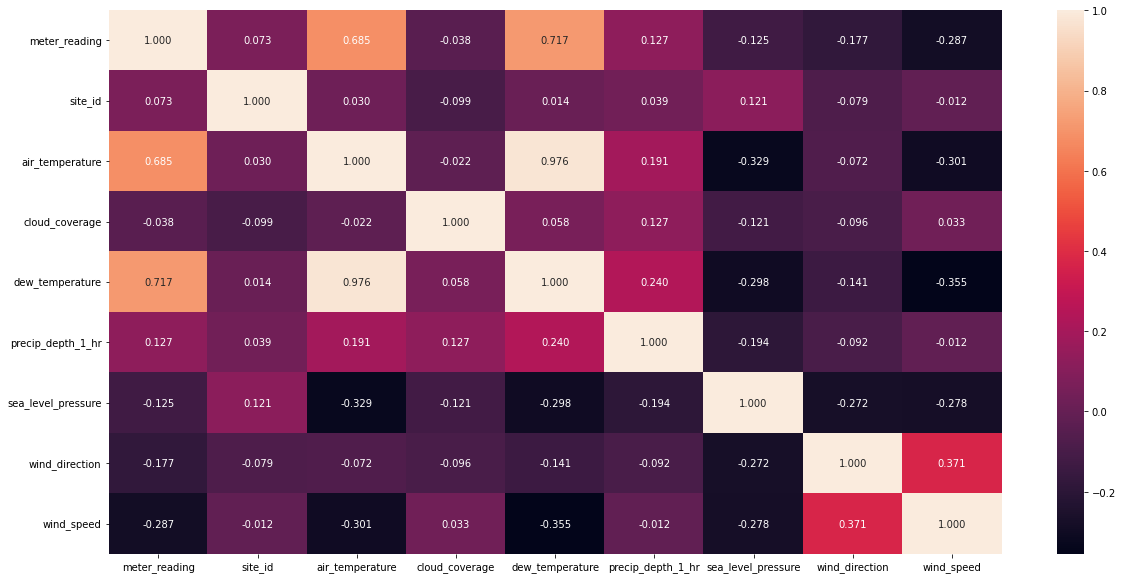

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data = weather_train_data_chilledWater.corr(), ax=ax, annot = True, fmt=".3f" )
plt.savefig("/content/drive/MyDrive/Building Systems Project/Heat map for Chilled Water.png",dpi = 300)

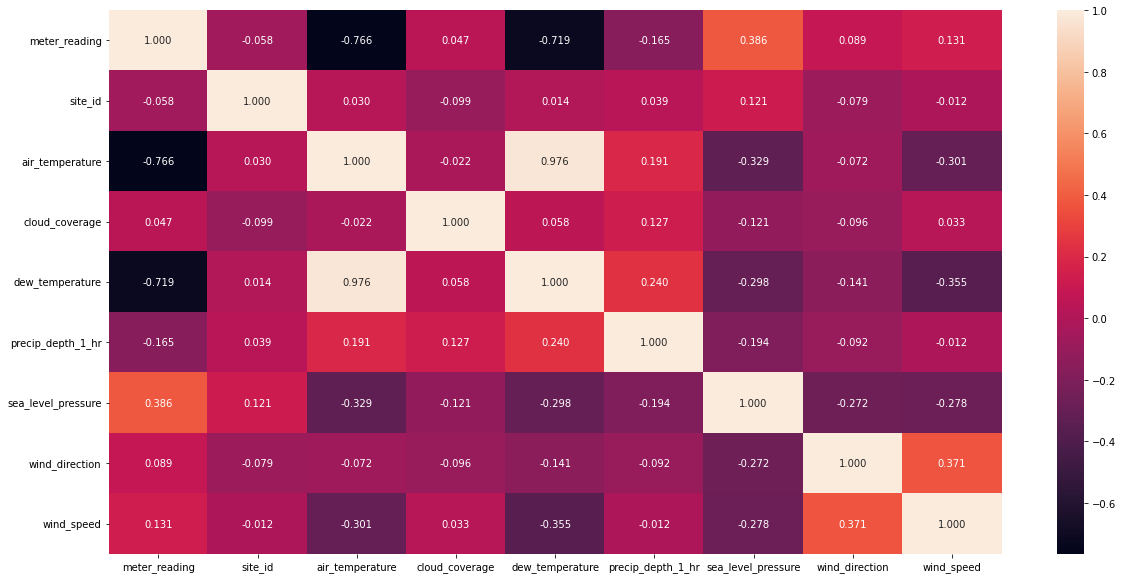

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data = weather_train_data_HotWater.corr(), ax=ax, annot = True, fmt=".3f" )
plt.savefig("/content/drive/MyDrive/Building Systems Project/Heat map for Hot Water.png",dpi = 300)

Now let's merge building data with meter data

In [ ]:
train_data_byBuilding = (train_data.groupby(["building_id","meter"]).meter_reading.mean().reset_index())

In [ ]:
train_data_byBuilding

,building_id,meter,meter_reading
0,0,0,146.454978
1,1,0,74.865393
2,2,0,14.551385
3,3,0,235.549966
4,4,0,976.556746
...,...,...,...
2375,1444,0,7.482127
2376,1445,0,4.732815
2377,1446,0,3.592162
2378,1447,0,187.117994


In [ ]:
train_building_data = pd.merge(train_data_byBuilding, Building_data,on="building_id",how="left")

In [ ]:
train_building_data

,building_id,meter,meter_reading,primary_use,square_feet,year_built,floor_count
0,0,0,146.454978,Education,7432,2008.0,NaN
1,1,0,74.865393,Education,2720,2004.0,NaN
2,2,0,14.551385,Education,5376,1991.0,NaN
3,3,0,235.549966,Education,23685,2002.0,NaN
4,4,0,976.556746,Education,116607,1975.0,NaN
...,...,...,...,...,...,...,...
2375,1444,0,7.482127,Entertainment/public assembly,19619,1914.0,NaN
2376,1445,0,4.732815,Education,4298,NaN,NaN
2377,1446,0,3.592162,Entertainment/public assembly,11265,1997.0,NaN
2378,1447,0,187.117994,Lodging/residential,29775,2001.0,NaN


In [ ]:
BuildingMeterData = train_building_data.drop(["floor_count"],axis = 1)

In [ ]:
BuildingMeterData

,building_id,meter,meter_reading,primary_use,square_feet,year_built
0,0,0,146.454978,Education,7432,2008.0
1,1,0,74.865393,Education,2720,2004.0
2,2,0,14.551385,Education,5376,1991.0
3,3,0,235.549966,Education,23685,2002.0
4,4,0,976.556746,Education,116607,1975.0
...,...,...,...,...,...,...
2375,1444,0,7.482127,Entertainment/public assembly,19619,1914.0
2376,1445,0,4.732815,Education,4298,NaN
2377,1446,0,3.592162,Entertainment/public assembly,11265,1997.0
2378,1447,0,187.117994,Lodging/residential,29775,2001.0


In [ ]:
BuildingMeterData.set_index("primary_use",inplace=True)

In [ ]:
BuildingMeterData

,building_id,meter,meter_reading,square_feet,year_built
primary_use,,,,,
Education,0,0,146.454978,7432,2008.0
Education,1,0,74.865393,2720,2004.0
Education,2,0,14.551385,5376,1991.0
Education,3,0,235.549966,23685,2002.0
Education,4,0,976.556746,116607,1975.0
...,...,...,...,...,...
Entertainment/public assembly,1444,0,7.482127,19619,1914.0
Education,1445,0,4.732815,4298,NaN
Entertainment/public assembly,1446,0,3.592162,11265,1997.0


In [ ]:
BuildingMeterData["meter"] = (BuildingMeterData["meter"].map({0:"electricity",1:"chilled_Water",2:"steam",3:"Hot_water"}))

In [ ]:
BuildingMeterData

,building_id,meter,meter_reading,square_feet,year_built
primary_use,,,,,
Education,0,electricity,146.454978,7432,2008.0
Education,1,electricity,74.865393,2720,2004.0
Education,2,electricity,14.551385,5376,1991.0
Education,3,electricity,235.549966,23685,2002.0
Education,4,electricity,976.556746,116607,1975.0
...,...,...,...,...,...
Entertainment/public assembly,1444,electricity,7.482127,19619,1914.0
Education,1445,electricity,4.732815,4298,NaN
Entertainment/public assembly,1446,electricity,3.592162,11265,1997.0


In [ ]:
Education_Building=BuildingMeterData.loc['Education']
Office_Building = BuildingMeterData.loc['Office']
Lodging_Building = BuildingMeterData.loc['Lodging/residential']
Entertainment_Building = BuildingMeterData.loc["Entertainment/public assembly"]
PublicServices_Building = BuildingMeterData.loc["Public services"]

In [ ]:
def corr(data):
  data.set_index("meter",inplace=True)
  data_electricity=data.loc["electricity"]
  data_steam = data.loc["steam"]
  data_chilled_Water = data.loc["chilled_Water"]
  data_Hot_water = data.loc["Hot_water"]
  return data_electricity.corr(),data_steam.corr(),data_chilled_Water.corr(),data_Hot_water.corr()


In [ ]:
corr(Education_Building)

(               building_id  meter_reading  square_feet  year_built
 building_id       1.000000       0.040288     0.127096   -0.171600
 meter_reading     0.040288       1.000000     0.691884    0.178225
 square_feet       0.127096       0.691884     1.000000    0.201253
 year_built       -0.171600       0.178225     0.201253    1.000000,
                building_id  meter_reading  square_feet  year_built
 building_id       1.000000       0.015212    -0.181498    0.160830
 meter_reading     0.015212       1.000000     0.139003    0.136113
 square_feet      -0.181498       0.139003     1.000000    0.148084
 year_built        0.160830       0.136113     0.148084    1.000000,
                building_id  meter_reading  square_feet  year_built
 building_id       1.000000      -0.029256     0.115284   -0.308674
 meter_reading    -0.029256       1.000000     0.344277    0.422280
 square_feet       0.115284       0.344277     1.000000    0.126674
 year_built       -0.308674       0.422280    

**# For the assignmnet I am not modifying much the building data with meter data but for the project I will perform full analysis.**


#Now I will perform some linear regression with weather data and meter data

In [ ]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()

#For the Assignment I will perform Machine Learning on the Weather_train_data_electricity because full analysis is quite lengthy and I will keep full analysis for the project

In [ ]:
weather_train_data_electricity.head()

,timestamp,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter,,,,,,,,,,
electricity,2016-01-01,126.716136,7.288043,5.365489,2.184524,0.467391,0.063025,1019.296341,173.491620,3.688587
electricity,2016-01-02,128.754801,7.340426,5.340160,1.988571,-0.322872,-0.033333,1016.618563,201.215470,4.015426
electricity,2016-01-03,127.366815,7.331551,5.482353,1.969512,0.240107,0.527778,1012.139458,205.537190,3.927807
electricity,2016-01-04,150.324425,7.164706,4.125294,1.971429,-1.981471,0.280992,1011.762416,226.737805,3.708235
electricity,2016-01-05,153.210311,7.109091,3.766667,1.859551,-1.519697,0.529167,1016.509790,184.716981,4.133030


In [ ]:
weather_train_data_electricity.tail()

,timestamp,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter,,,,,,,,,,
electricity,2016-12-27,158.977885,7.484211,7.958421,2.285024,3.553684,0.282869,1022.201425,180.189702,3.267810
electricity,2016-12-28,163.956063,7.480418,6.505483,1.538117,1.417493,0.075099,1022.150000,164.220430,2.405759
electricity,2016-12-29,165.924481,7.492147,5.672775,1.557018,1.148691,1.100000,1019.173088,144.797844,2.909424
electricity,2016-12-30,164.607010,7.500000,4.369531,2.869318,-2.324479,0.011719,1016.457542,230.459459,3.894531
electricity,2016-12-31,150.454766,7.492147,3.828534,3.415584,-1.652094,0.330769,1017.267135,203.163539,3.722251


In [ ]:
MachineLearningData = weather_train_data_electricity.set_index("timestamp")

In [ ]:
MachineLearningData.head()

,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,,
2016-01-01,126.716136,7.288043,5.365489,2.184524,0.467391,0.063025,1019.296341,173.491620,3.688587
2016-01-02,128.754801,7.340426,5.340160,1.988571,-0.322872,-0.033333,1016.618563,201.215470,4.015426
2016-01-03,127.366815,7.331551,5.482353,1.969512,0.240107,0.527778,1012.139458,205.537190,3.927807
2016-01-04,150.324425,7.164706,4.125294,1.971429,-1.981471,0.280992,1011.762416,226.737805,3.708235
2016-01-05,153.210311,7.109091,3.766667,1.859551,-1.519697,0.529167,1016.509790,184.716981,4.133030


In [ ]:
MachineLearningData.drop(["site_id"],axis = 1,inplace=True) 

In [ ]:
MachineLearningData.tail(32)

In [ ]:
trainData = MachineLearningData.loc["2016-01-01":"2016-12-25"]
validationData = MachineLearningData.loc["2016-12-26":"2016-12-31"]

In [ ]:
train_Targets = trainData["meter_reading"]
train_features = trainData.drop(["meter_reading"],axis = 1)

In [ ]:
train_Targets


timestamp
2016-01-01    126.716136
2016-01-02    128.754801
2016-01-03    127.366815
2016-01-04    150.324425
2016-01-05    153.210311
                 ...    
2016-12-21    180.970677
2016-12-22    174.193417
2016-12-23    165.638815
2016-12-24    148.332233
2016-12-25    146.179377
Name: meter_reading, Length: 360, dtype: float64

In [ ]:
train_features

,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,
2016-01-01,5.365489,2.184524,0.467391,0.063025,1019.296341,173.491620,3.688587
2016-01-02,5.340160,1.988571,-0.322872,-0.033333,1016.618563,201.215470,4.015426
2016-01-03,5.482353,1.969512,0.240107,0.527778,1012.139458,205.537190,3.927807
2016-01-04,4.125294,1.971429,-1.981471,0.280992,1011.762416,226.737805,3.708235
2016-01-05,3.766667,1.859551,-1.519697,0.529167,1016.509790,184.716981,4.133030
...,...,...,...,...,...,...,...
2016-12-21,6.103646,1.713333,-0.164323,-0.058333,1020.179722,187.021858,3.351042
2016-12-22,6.866927,1.779736,1.551823,0.731343,1019.842330,209.354839,3.196354
2016-12-23,7.137760,2.011494,2.325521,0.825000,1022.165625,191.087533,3.683073


In [ ]:
linear_reg.fit(train_features,train_Targets)

LinearRegression()

In [ ]:
validation_Target = validationData["meter_reading"]
validation_features = validationData.drop("meter_reading",axis = 1)

In [ ]:
validation_Target.head()

timestamp
2016-12-26    153.493282
2016-12-27    158.977885
2016-12-28    163.956063
2016-12-29    165.924481
2016-12-30    164.607010
Name: meter_reading, dtype: float64

In [ ]:
predictted_meter_reading = linear_reg.predict(validation_features)

In [ ]:
predictted_meter_reading

array([168.67891461, 175.48653982, 174.49995883, 167.19389783,
       151.47504924, 149.92376563])

In [ ]:
predictted_meter_reading_DF = pd.DataFrame(predictted_meter_reading,index=validation_Target.index,columns=["Predicted_meter_reading_LR"])

In [ ]:
predictted_meter_reading_DF.head()

,Predicted_meter_reading_LR
timestamp,
2016-12-26,168.678915
2016-12-27,175.486540
2016-12-28,174.499959
2016-12-29,167.193898
2016-12-30,151.475049


In [ ]:
LR_Comparison = predictted_meter_reading_DF.join(validation_Target)

In [ ]:
LR_Comparison.head()

,Predicted_meter_reading_LR,meter_reading
timestamp,,
2016-12-26,168.678915,153.493282
2016-12-27,175.486540,158.977885
2016-12-28,174.499959,163.956063
2016-12-29,167.193898,165.924481
2016-12-30,151.475049,164.607010


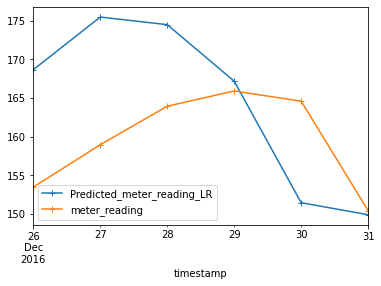

In [ ]:
LR_Comparison.plot(marker="+")

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MAE_LR_validation=mean_absolute_error(predictted_meter_reading,validation_Target)
MSE_LR_validation=mean_squared_error(predictted_meter_reading,validation_Target)
R2_LR_validation=r2_score(predictted_meter_reading,validation_Target)
print("MAE_LR = "+str(MAE_LR_validation)+" MSE_LR = "+str(MSE_LR_validation)+" R_2_LR = "+str(R2_LR_validation))

MAE_LR = 9.52842678932087 MSE_LR = 131.44243856356647 R_2_LR = -0.25676306419466455


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor()

In [ ]:
RF_reg.fit(train_features,train_Targets)

RandomForestRegressor()

In [ ]:
predictted_meter_reading_RF = RF_reg.predict(validation_features)

In [ ]:
predictted_meter_reading_RF

array([162.03857063, 164.85055196, 171.95199228, 170.87717998,
       162.3211375 , 153.21498321])

In [ ]:
DF_predicted_meter_reading_RF = pd.DataFrame(predictted_meter_reading,index=validation_Target.index,columns=["meter_reading_RF"])

In [ ]:
DF_predicted_meter_reading_RF

,meter_reading_RF
timestamp,
2016-12-26,168.678915
2016-12-27,175.486540
2016-12-28,174.499959
2016-12-29,167.193898
2016-12-30,151.475049
2016-12-31,149.923766


In [ ]:
RF_Comparison = DF_predicted_meter_reading_RF.join(validation_Target)

In [ ]:
RF_Comparison

,meter_reading_RF,meter_reading
timestamp,,
2016-12-26,168.678915,153.493282
2016-12-27,175.486540,158.977885
2016-12-28,174.499959,163.956063
2016-12-29,167.193898,165.924481
2016-12-30,151.475049,164.607010
2016-12-31,149.923766,150.454766


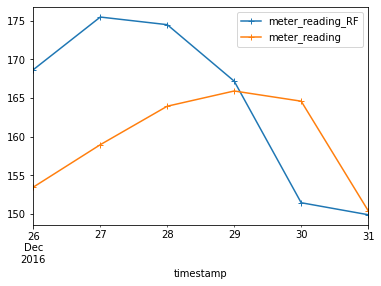

In [ ]:
RF_Comparison.plot(marker="+")

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MAE_RF_validation=mean_absolute_error(predictted_meter_reading_RF,validation_Target)
MSE_RF_validation=mean_squared_error(predictted_meter_reading_RF,validation_Target)
R2_RF_validation=r2_score(predictted_meter_reading_RF,validation_Target)
print("MAE_RF = "+str(MAE_RF_validation)+" MSE_RF = "+str(MSE_RF_validation)+" R_2_RF = "+str(R2_RF_validation))

MAE_RF = 5.402112136036564 MSE_RF = 34.80304947385975 R_2_RF = 0.10751241937193357


Although, the error in our data is still very high this is mainly due to the fact that we are using daily avaerage data instead of hourly data but for the project we will incorpporate the hourly data for more better prediction
**I am not doing hourly analysis here beacause for that I have to arrange building data, train data and weather data based on the building id, and site id which will take a lot of time and efforts so that I reserved for the project**

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

In [ ]:
MachineLearningData_target = MachineLearningData["meter_reading"]
MachineLearningData_feature = MachineLearningData.drop("meter_reading",axis=1)

In [ ]:
for train_index,validation_index in tscv.split(MachineLearningData_feature):
  print("Train Index")
  print(train_index)
  print("Validation INdex")
  print(validation_index)

Train Index
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
Validation INdex
[36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68]
Train Index
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]
Validation INdex
[ 69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101]
Train Index
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  

In [ ]:
R2Score_list = []
for train_index,validation_index in tscv.split(MachineLearningData_feature):
  DF_train_features=MachineLearningData_feature.iloc[train_index,:]
  DF_validation_features=MachineLearningData_feature.iloc[validation_index,:]
  DF_train_target = MachineLearningData_target.iloc[train_index]
  DF_validation_target = MachineLearningData_target.iloc[validation_index]
  RF_reg.fit(DF_train_features,DF_train_target)
  Predict_RF_comparison_tscv = pd.DataFrame(index=DF_validation_target)
  Predict_RF_comparison_tscv["prediction"] = RF_reg.predict(DF_validation_features)
  R2Score_thisSegment=r2_score(Predict_RF_comparison_tscv["prediction"],DF_validation_target)
  R2Score_list.append(R2Score_thisSegment)
print(R2Score_list)
average_R2Score=np.average(R2Score_list)
print(average_R2Score)

[-2.967636197806038, -12.399045031031381, -5.850744735238627, -98.82989680060189, -9.867433515012603, -4.018255656115213, -11.19788633179611, -8.72326618961594, -11.316602672432914, -45.7191541241692]
-21.08899212538199


**#As one can see we have got a lot of error this is because we didn't do the full analysis because full analysis is a thing whcih is beyond the scope of this assignment.
The purpose of this assignment was to understand the application of machine learning although we didn;t use it correctly as our data was insufficiant but we will improve it when we submit our project**